In [1]:
 #PARA MOSTRAR LOS GRAFICOS
%matplotlib inline


#PASO 1
from skimage import io #Librerias para importar las imagenes

#PASO 2
from skimage import img_as_ubyte#Mostrar las 3 imagenes
from skimage.color import rgb2grey#Mostrar las 3 imagenes
from skimage.color import rgb2hsv#Mostrar las 3 imagenes
import numpy as np#Mostrar las 3 imagenes
import matplotlib.pyplot as plt#Mostrar las 3 imagenes

#PASO 3
from skimage.filters import threshold_otsu

#PASO 4

#PASO 5
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image, remove_small_objects
from skimage.morphology import disk, reconstruction
from skimage.morphology import binary_erosion,rectangle,binary_dilation

#PASO 6
from skimage.transform import hough_line, hough_line_peaks,probabilistic_hough_line
from skimage.feature import canny
from skimage import data
##imports para el uso de interactive
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

#PASO 7

#PASO 8
import math

#PASO 9
import networkx as nx
from networkx.algorithms import approximation as apxa



In [19]:
#PASO 1
def leerImagen():
    pathImg="/Users/Ismael/Desktop/TFG_DietaPorDientes/TrabajosPasadosPorJose/dietaJose/ATP12 UE62A 69 1_2.jpg"
    img = io.imread(pathImg)
    return img 
#img=leerImagen()

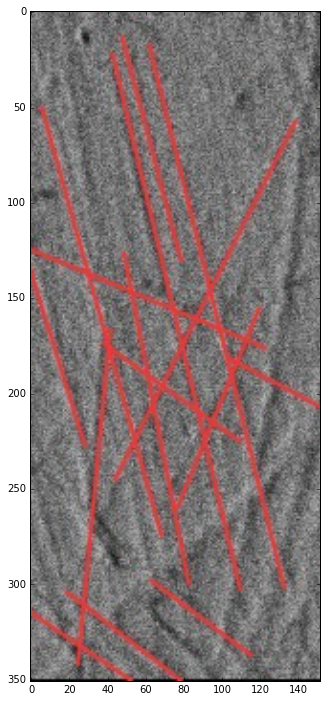

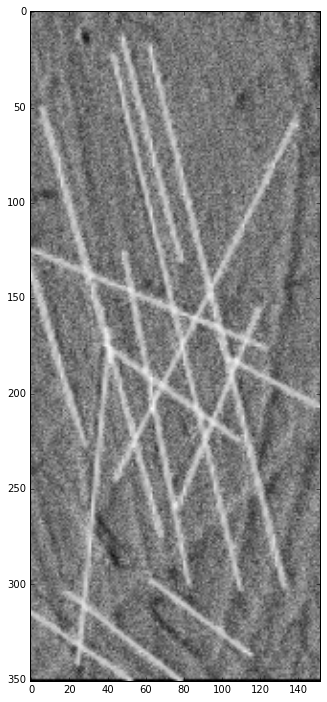

In [30]:
#PASO 2
def distanciaAlRojo():
    rojo=img[:,:,0]
    imgHSV=rgb2hsv(img)
    distance_red = rgb2grey(1 - np.abs(imgHSV - (0, 1, 0)))
    return distance_red
#distance_red=distanciaAlRojo()
plt.figure(figsize=(12, 12)) 
plt.imshow(img, cmap='gray')

plt.figure(figsize=(12, 12)) 
plt.imshow(rojo, cmap='gray')


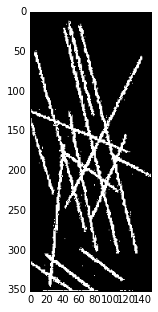

In [32]:
#PASO 3
def binarizar(distance_red):
    threshold_global_otsu = threshold_otsu(distance_red)
    imgBin = distance_red >= threshold_global_otsu
    return imgBin

imgBin=binarizar(distance_red)
plt.figure(figsize=(10, 5)) 
plt.imshow(imgBin, cmap='gray')


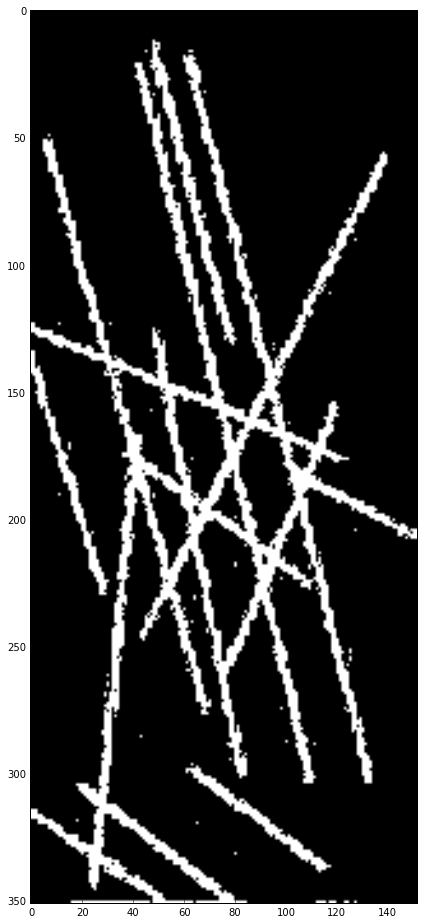

In [23]:
#PASO 4
def cropImg():
    #imgBinCrop = imgBin[0:750,500:1500]
    #imgCrop = img[0:750,500:1500]

    imgBinCrop = imgBin
    imgCrop = img

    #imgBinCrop = imgBin[0:750,0:750]
    #imgCrop = img[0:750,0:750]
    return imgBinCrop,imgCrop

#imgBinCrop,imgCrop=cropImg()
plt.figure(figsize=(16, 16)) 
plt.imshow(imgBinCrop, cmap='gray')

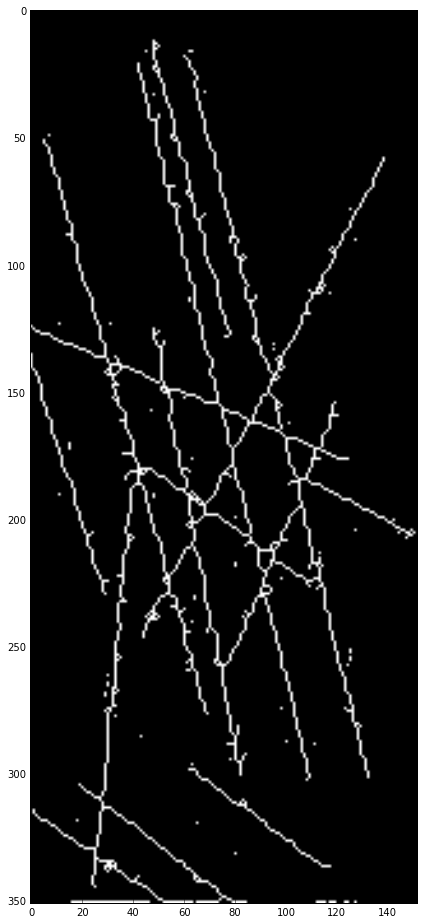

In [24]:
#PASO 5
def reducirGrosor():
    selem2 = rectangle(8,1)
    selem = rectangle(3,1)
    #sinRuido = binary_dilation(imgBinCrop,selem2)
    #sinRuido = binary_erosion(imgBinCrop,selem)
    sinRuido = skeletonize(imgBinCrop)
    return 

#sinRuido=reducirGrosor()
plt.figure(figsize=(16, 16)) 
plt.imshow(sinRuido, cmap='gray')


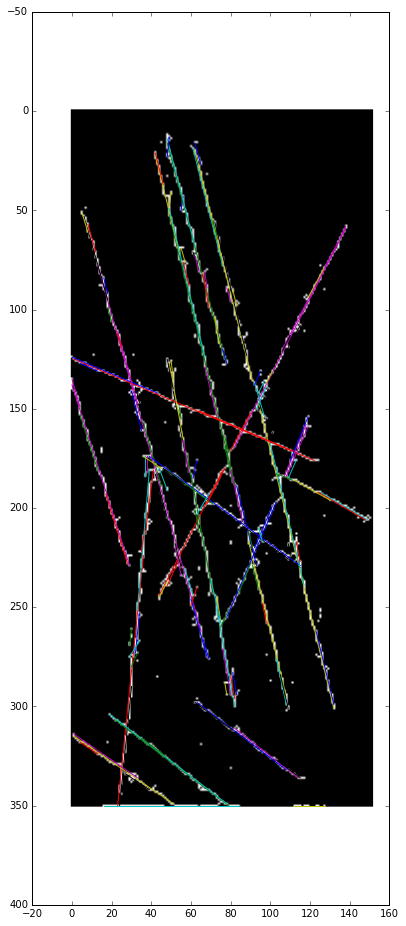

In [7]:
#PASO 6 (SOLO OBSERBAR CAMBIOS EN LAS FUNCION)
def proHoughObser(threshold,line_length,line_gap):

    lines = probabilistic_hough_line(sinRuido, threshold, line_length,
                                 line_gap)
    plt.figure(figsize=(16, 16)) 
    plt.imshow(sinRuido, cmap=plt.cm.gray)
    for line in lines:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
    return None 
w = interactive(proHoughObser, threshold=13, line_length=6,line_gap=8)#
display(w)
#m=proHough(10,5,3)


In [252]:
#PASO 7
def proHough(threshold,line_length,line_gap):

    lines = probabilistic_hough_line(sinRuido, threshold, line_length,
                                 line_gap)
    plt.figure(figsize=(16, 16)) 
    plt.imshow(sinRuido, cmap=plt.cm.gray)
    for line in lines:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
    return lines 

In [9]:
#PASO 8
def segmentsDistance(seg1, seg2):
    return segments_distance(seg1[0][0], seg1[0][1], seg1[1][0], seg1[1][1],
                             seg2[0][0], seg2[0][1], seg2[1][0], seg2[1][1])

def segments_distance(x11, y11, x12, y12, x21, y21, x22, y22):
    """distance between two segments in the plane:
    one segment is (x11, y11) to (x12, y12)
    the other is   (x21, y21) to (x22, y22)
    """
    if segments_intersect(x11, y11, x12, y12, x21, y21, x22, y22): 
            return 0
    # try each of the 4 vertices w/the other segment
    distances = []
    distances.append(point_segment_distance(x11, y11, x21, y21, x22, y22))
    distances.append(point_segment_distance(x12, y12, x21, y21, x22, y22))
    distances.append(point_segment_distance(x21, y21, x11, y11, x12, y12))
    distances.append(point_segment_distance(x22, y22, x11, y11, x12, y12))
    return min(distances)

def segments_intersect(x11, y11, x12, y12, x21, y21, x22, y22):
    """ whether two segments in the plane intersect:
      one segment is (x11, y11) to (x12, y12)
      the other is   (x21, y21) to (x22, y22)
    """
    dx1 = x12 - x11
    dy1 = y12 - y11
    dx2 = x22 - x21
    dy2 = y22 - y21
    delta = dx2 * dy1 - dy2 * dx1
    if delta == 0: 
        return False  # parallel segments
    s = (dx1 * (y21 - y11) + dy1 * (x11 - x21)) / delta
    t = (dx2 * (y11 - y21) + dy2 * (x21 - x11)) / (-delta)
    return (0 <= s <= 1) and (0 <= t <= 1)

def point_segment_distance(px, py, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    if dx == dy == 0:  # the segment's just a point
        return math.hypot(px - x1, py - y1)

    # Calculate the t that minimizes the distance.
    t = ((px - x1) * dx + (py - y1) * dy) / (dx * dx + dy * dy)

    # See if this represents one of the segment's
    # end points or a point in the middle.
    if t < 0:
        dx = px - x1
        dy = py - y1
    elif t > 1:
        dx = px - x2
        dy = py - y2
    else:
        near_x = x1 + t * dx
        near_y = y1 + t * dy
        dx = px - near_x
        dy = py - near_y

    return math.hypot(dx, dy)
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]

def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    if cos_ > 1: cos_ =1
    # Get angle in radians and then convert to degrees
    angle = math.acos(cos_)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 

        return ang_deg

In [373]:
#PASO 9
epsilon1=6#DISTANCIA
epsilon2=15#ANGULO
G=nx.Graph()
#8/5
def combina(epsilon1,epsilon2,lines,G): 
    for i in range(len(lines)):
        G.add_node(i)

    for i in range(len(lines)-1):
        for j in range(i+1,len(lines)):
            angle = ang(lines[i],lines[j])        
            #print(angle)
            if angle <= epsilon2:
                distance = segmentsDistance(lines[i],lines[j])
                #print(distance)
                if distance <= epsilon1:
                    #print("combina ",i,j)
                    G.add_edge(i,j)
                    
                   
    return G
#combina(1,1)
#............

In [369]:
k_components = apxa.k_components(G)

def pointDistance(p1, p2):
    dx = p1[0] - p2[0]
    dy = p1[1] - p2[1]
    return (dx*dx + dy*dy)**0.5

def combinaSegmentos(segmentosList):
    #print("combina",segmentosList)
    Xs=list(map(lambda x:[x[0][0],x[1][0]],segmentosList))
    Ys=list(map(lambda x:[x[0][1],x[1][1]],segmentosList))
    xMax=np.max(Xs)
    yMax=np.max(Ys)
    xMin=np.min(Xs)
    yMin=np.min(Ys)
    if (xMax,yMax) in set(map(lambda x:x[0],segmentosList)):
        #print("devuelvo",((xMax,yMax),(xMin,yMin)))
        return ((xMax,yMax),(xMin,yMin))
    else:
        #print("devuelvo",((xMax,yMin),(xMin,yMax)))
        return ((xMax,yMin),(xMin,yMax))
    
def segmentosVerdad(k_components,lines):
    segmentosDeVerdad = []
    for i in range(len(k_components[1])):
        segmentos=list(map(lambda x:lines[x],k_components[1][i]))
        segmentosDeVerdad.append(combinaSegmentos(segmentos))
    return segmentosDeVerdad

segmentosDeVerdad=segmentosVerdad(k_components,lines)
segmentosDeVerdad


[((149, 14), (0, 350))]

In [365]:
def mostrar():
    plt.figure(figsize=(20, 20)) 
    plt.imshow(imgCrop, cmap=plt.cm.gray)
    for line in segmentosDeVerdad:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'b')
    print(len(segmentosDeVerdad),"hay 15 lineas realmente")
#mostrar() 

48


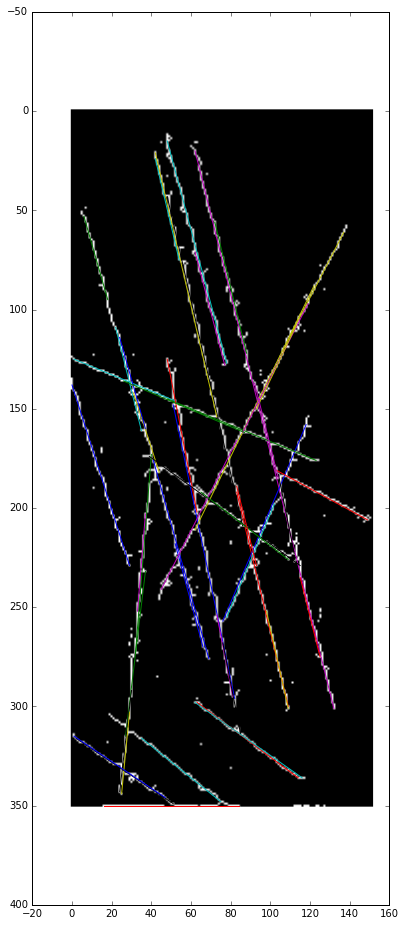

In [381]:
img=leerImagen()
distance_red=distanciaAlRojo()
imgBin=binarizar(distance_red)
imgBinCrop,imgCrop=cropImg()
sinRuido=reducirGrosor()
lines=proHough(1,40,10)
print(len(lines))


48 12
12 hay 15 lineas realmente


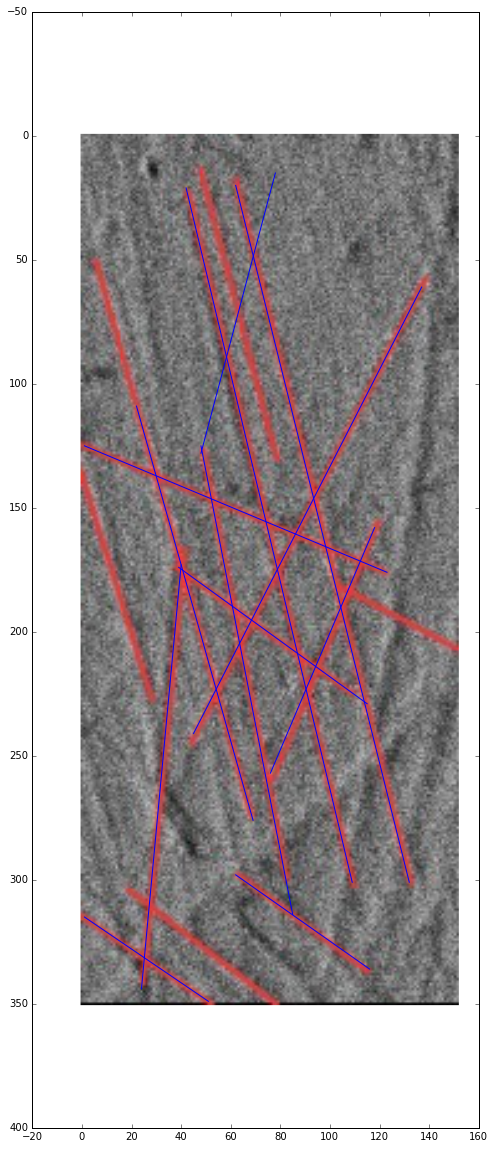

In [389]:
G=nx.Graph()
#8/5
#epsilon1(DISTANCIA),epsilon2(ANGULO)
            
G=nx.Graph()
G=combina(4,3,lines,G)
k_components = apxa.k_components(G)
segmentosDeVerdad=segmentosVerdad(k_components,lines)
print(len(lines),len(k_components[1]))
mostrar()